# Visualization experiments: Features
* This notebook contains visualizations of the normalized feature values.

#### Import requirements

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from matplotlib.pyplot import title

#### Helper functions

In [2]:
def load_data(file_name):
    '''
    function that loads CSV files
    without adding new column for index
    '''
    df = pd.read_csv(file_name, index_col=0)
    return df

In [3]:
def visualize_features(df, features, graph_title, name, newsela=True):
    '''
    function that visualizes the mean value of features by level
    features:        list of features to visualize, have to be names of columns from DF
    graph_title:     will be title of graph
    name:            name under which graph is saved inside the png folder
    newsela:         if True, the levels are expected to be 0,1,2,3,4 (as in Newsela)
                     if False, they are expected to be Kids,Students,Scholars (as in Britannica)
    '''
    
    df = df.drop(columns=['graph'])
    df = df.select_dtypes(include=['float64','int'])
    normalized_df=df.apply(lambda x: (x-x.min()) / (x.max()-x.min()), axis=0)
    means = normalized_df.groupby('level').mean()
    
    means[features].plot().legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize = 'x-large')
    if newsela:
        xticks([0,0.25,0.5,0.75,1], ['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4'])  
    else:
        xticks([0, 0.5, 1], ['Kids', 'Students', 'Scholars'], fontsize = 'x-large')  
    title(graph_title, fontsize = 'x-large')
    plt.savefig('png/'+name, bbox_inches="tight")

#### Demo

In [4]:
df = load_data('csv/britannica_with_features.csv')

In [5]:
df.columns

Index(['path', 'name', 'score', 'level', 'annotations', 'sentences',
       'paragraphs', 'graph', 'sel_graph', 'isolates', 'sel_graph_data',
       'node_degree', 'clustering_coef', 'av_pagerank',
       'pairwise_distance_per_sent', 'graph_conncomp_per_sent',
       'clustering_coef_per_sent', 'graph_density_per_sent', 'graph_density',
       'graph_conncomp_per_para', 'clustering_coef_per_para',
       'graph_density_per_para', 'pairwise_distance_per_para',
       'pairwise_semrel_per_sent', 'pairwise_semrel_per_para'],
      dtype='object')

In [6]:
single = ['node_degree', 'clustering_coef', 'av_pagerank']
pairwise = ['pairwise_distance_per_sent', 'pairwise_distance_per_para', 'pairwise_semrel_per_sent', 
       'pairwise_semrel_per_para']
global_ = ['graph_density_per_sent', 'graph_density_per_para',
      'graph_conncomp_per_sent', 'graph_conncomp_per_para',
      'clustering_coef_per_sent', 'clustering_coef_per_para']

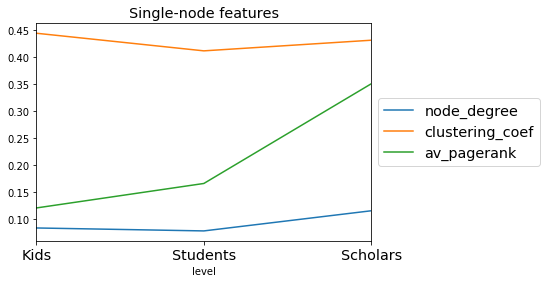

In [7]:
visualize_features(df, single, 'Single-node features', 'britannica_single.png', newsela=False)

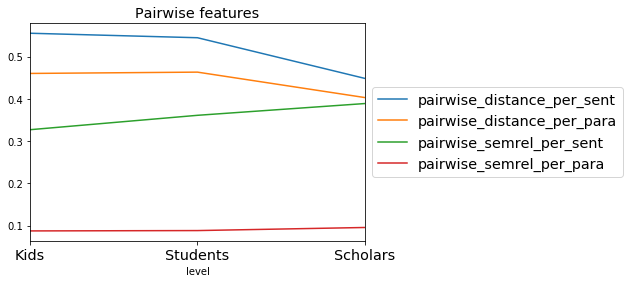

In [8]:
visualize_features(df, pairwise, 'Pairwise features', 'britannica_pairwise.png', newsela=False)

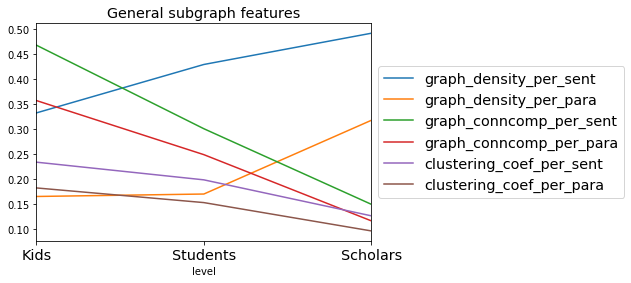

In [9]:
visualize_features(df, global_, 'General subgraph features', 'britannica_global.png', newsela=False)

In [10]:
df = load_data('csv/newsela_with_features.csv')

In [11]:
df.head()

,index,path,name,score,level,annotations,sentences,paragraphs,graph,sel_graph,...,graph_conncomp_per_sent,clustering_coef_per_sent,graph_density_per_sent,graph_density,graph_conncomp_per_para,clustering_coef_per_para,graph_density_per_para,pairwise_distance_per_para,pairwise_semrel_per_sent,pairwise_semrel_per_para
0,2,Narwhal-whales-sounds-44418-1400.txt,Narwhal-whales-sounds,1400,0,[{'URI': 'http://dbpedia.org/resource/Narwhal'...,"[{'http://dbpedia.org/resource/Narwhal'}, {'ht...",[{'http://dbpedia.org/resource/The_Marriage_of...,NaN,"[('http://dbpedia.org/resource/Narwhal', 'http...",...,3.000000,2.908046,0.271957,0.010602,48.0,3.187500,0.009030,0.842754,0.070321,0.002751
1,1,Narwhal-whales-sounds-44421-1220.txt,Narwhal-whales-sounds,1220,1,[{'URI': 'http://dbpedia.org/resource/Narwhal'...,"[{'http://dbpedia.org/resource/Unicorn', 'http...",[{'http://dbpedia.org/resource/The_Marriage_of...,NaN,"[('http://dbpedia.org/resource/Narwhal', 'http...",...,2.315789,2.886364,0.272743,0.010469,46.0,3.217391,0.009377,0.850121,0.071841,0.002685
2,0,Narwhal-whales-sounds-44422-1050.txt,Narwhal-whales-sounds,1050,2,[{'URI': 'http://dbpedia.org/resource/Narwhal'...,"[{'http://dbpedia.org/resource/Unicorn', 'http...",[{'http://dbpedia.org/resource/The_Marriage_of...,NaN,"[('http://dbpedia.org/resource/Narwhal', 'http...",...,2.268293,2.935484,0.315646,0.010195,48.0,3.312500,0.008837,0.894048,0.082274,0.002546
3,4,Narwhal-whales-sounds-44419-830.txt,Narwhal-whales-sounds,830,3,[{'URI': 'http://dbpedia.org/resource/Narwhal'...,"[{'http://dbpedia.org/resource/Narwhal'}, {'ht...",[{'http://dbpedia.org/resource/The_Marriage_of...,NaN,"[('http://dbpedia.org/resource/Narwhal', 'http...",...,1.833333,2.701299,0.466314,0.013033,38.0,2.763158,0.012271,0.818922,0.108831,0.003464
4,3,Narwhal-whales-sounds-44420-570.txt,Narwhal-whales-sounds,570,4,[{'URI': 'http://dbpedia.org/resource/Narwhal'...,"[{'http://dbpedia.org/resource/Narwhal', 'http...",[{'http://dbpedia.org/resource/The_Marriage_of...,NaN,"[('http://dbpedia.org/resource/Narwhal', 'http...",...,1.428571,2.620000,0.446803,0.023762,23.0,2.434783,0.021429,0.884058,0.127189,0.004840


In [12]:
df.columns

Index(['index', 'path', 'name', 'score', 'level', 'annotations', 'sentences',
       'paragraphs', 'graph', 'sel_graph', 'isolates', 'sel_graph_data',
       'node_degree', 'clustering_coef', 'av_pagerank',
       'pairwise_distance_per_sent', 'graph_conncomp_per_sent',
       'clustering_coef_per_sent', 'graph_density_per_sent', 'graph_density',
       'graph_conncomp_per_para', 'clustering_coef_per_para',
       'graph_density_per_para', 'pairwise_distance_per_para',
       'pairwise_semrel_per_sent', 'pairwise_semrel_per_para'],
      dtype='object')

In [13]:
pairwise_no_para = ['pairwise_distance_per_sent', 'pairwise_semrel_per_sent']
global_no_para = ['graph_density_per_sent', 'graph_conncomp_per_sent', 'clustering_coef_per_sent']

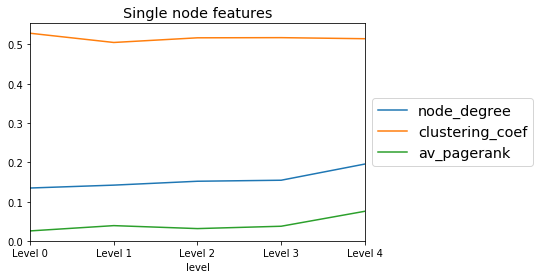

In [14]:
visualize_features(df, single, 'Single node features', 'newsela_single.png', newsela=True)

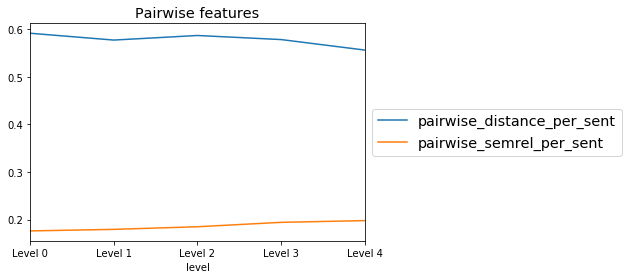

In [15]:
visualize_features(df, pairwise_no_para, 'Pairwise features', 'newsela_pairwise.png', newsela=True)

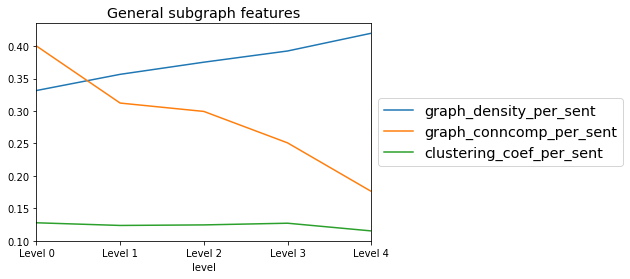

In [16]:
visualize_features(df, global_no_para, 'General subgraph features', 'newsela_global.png', newsela=True)